<a href="https://colab.research.google.com/github/Gakori/E-commerce/blob/master/Advertisment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESEARCH QUESTION**
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

From the question derive the problem statement and the solution.

# **Problem statement**

An entrepreneur with an online cryptography would like to advertise her blog. She target audiences from different countries and would like to determine who are more likely to click on her adverts.

# **Solution**

As a data scientist, I will consider all the variables the entrepreneur collected and will be used to identify the target audience.

# **METRIC FOR SUCCESS**

Perform comprehensive data cleaning on the data. Draw important insights from univariate and bivariate analysis by performing measures of central tendency and graphical presentation.


# **UNDERSTANDING THE CONTEXT**

An entrepreneur has collected data to determine her target audience. 

# **EXPERIMENTAL DESIGN**

Load the R library and import the data.

Clean the data.

Perform univariate and multivariate analysis.

Conclusions and recommendations.

# **Load the data**


In [ ]:
# load r extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# import csv file

%%R
advert <- read.csv('advertising.csv', TRUE, ',')
head(advert)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1                    68.95  35    61833.90               256.09
2                    80.23  31    68441.85               193.77
3                    69.47  26    59785.94               236.50
4                    74.15  29    54806.18               245.89
5                    68.37  35    73889.99               225.58
6                    59.99  23    59761.56               226.74
                          Ad.Topic.Line           City Male    Country
1    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2    Monitored national standardization      West Jodi    1      Nauru
3      Organic bottom-line service-desk       Davidton    0 San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5         Robust logistical utilization   South Manuel    0    Iceland
6       Sharable client-driven software      Jamieberg    1     Norway
            Timestamp Clicked.on.Ad
1 2016-03-27 00:53:

In [ ]:
# class of the imported csv

%%R
class(advert)

[1] "data.frame"


In [ ]:
## Review structure of the dataframe

%%R
dim(advert)

[1] 1000   10


*The data frame contains 1000 rows and 10 columns*


In [ ]:
## Review datatypes

%%R
str(advert)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


*Daily time spent, area income, internet usage are all numerical. Age, male,clicked on ad are integers. Topic line,city,country,time stamp are all factors.*

In [ ]:
# Statistical summary

%%R
summary(advert)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

*Displays the statistical summary of the variables. The maximum daily time spent on a site is 91 minutes and 43 seconds. Most people who visit the site are mainly of age 36 having 19 years as minimum and 61 years as the maximum age.*

# **MISSING VALUES AND OUTLIERS**

In [ ]:
# Checking for missing values in the columns

%%R
colSums(is.na(advert))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0 


*There are no missing values in the data*

In [ ]:
# Checking duplicates

%%R
anyDuplicated(advert)

[1] 0


*There are no duplicates*

## Checking for outliers using box plots.stats


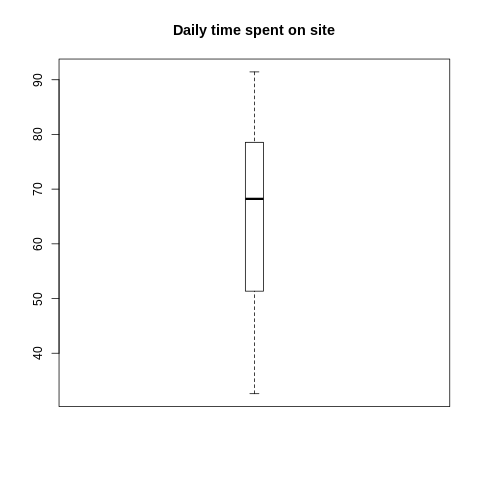

In [ ]:
# daily time spent on site

%%R
time_site <- boxplot.stats(advert$Daily.Time.Spent.on.Site)$out
time_site

boxplot(advert$Daily.Time.Spent.on.Site, main="Daily time spent on site", boxwex=0.1)

*no outliers in time spent on site*

In [ ]:
# age

%%R
age <- boxplot.stats(advert$Daily.Time.Spent.on.Site)$out
age

numeric(0)


*no outliers in the age column*

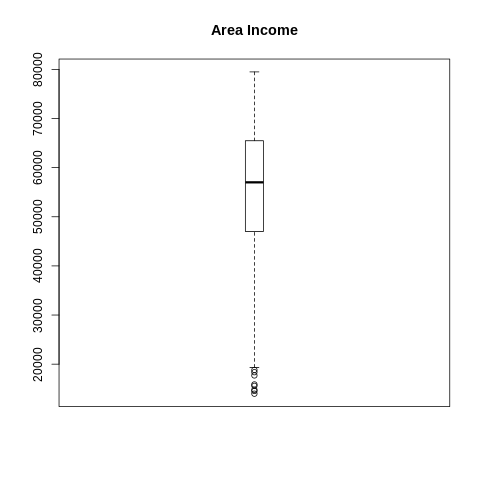

In [ ]:
# income

%%R
areaincome <- boxplot.stats(advert$Area.Income)$out
areaincome

boxplot(advert$Area.Income, main="Area Income", boxwex=0.1)

*the area.income contains outliers < 20000*

In [ ]:
# internet usage

%%R
net_usage <- boxplot.stats(advert$Daily.Internet.Usage)$out
net_usage

numeric(0)


*no outliers in internet usage column*

# **UNIVARIATE ANALYSIS**

## MEAN

In [ ]:
%%R
print(mean(advert$Clicked.on.Ad))
print(mean(advert$Daily.Time.Spent.on.Site))
print(mean(advert$Age))
print(mean(advert$Area.Income))
print(mean(advert$Daily.Internet.Usage))

[1] 0.5
[1] 65.0002
[1] 36.009
[1] 55000
[1] 180.0001


The average time spent on a site is 65 minutes.

Most of the people who visit the site are of age 35 years.

The average area income is 55K.

The average internet usage is 180.

## MEDIAN

*It is the middle most value.*

In [ ]:
%%R
print(median(advert$Clicked.on.Ad))
print(median(advert$Daily.Time.Spent.on.Site))
print(median(advert$Age))
print(median(advert$Area.Income))
print(median(advert$Daily.Internet.Usage))

[1] 0.5
[1] 68.215
[1] 35
[1] 57012.3
[1] 183.13


The median of time spent on a site is 68 minutes.

Median age of most of the people who visit the site is age 35 years.

The median income is 57012.3.

The median average internet usage is 183.3

## MODE

The mode is the value that has highest number of occurrences in a set of data. Created using a function as it does not have a builtin function.

In [ ]:
# timestamp mode

%%R
getmode <- function(v) {
   uniqv <- unique(advert$Timestamp)
   uniqv[which.max(tabulate(match(advert$Timestamp, uniqv)))]
}

result <- getmode(v)
print(result)

[1] 2016-03-27 00:53:11
1000 Levels: 2016-01-01 02:52:10 2016-01-01 03:35:35 ... 2016-07-24 00:22:16


*The most occuring datetimw is 2016-03-27 00:53:11*

In [ ]:
# topic line mode

%%R
getmode <- function(v) {
   uniqv <- unique(advert$Ad.Topic.Line)
   uniqv[which.max(tabulate(match(advert$Ad.Topic.Line, uniqv)))]
}

result <- getmode(v)
print(result)

[1] Cloned 5thgeneration orchestration
1000 Levels: Adaptive 24hour Graphic Interface ... Visionary reciprocal circuit


*The topic 'Cloned 5thgeneration orchestration' occurred multiple times.*

In [ ]:
# city mode

%%R
getmode <- function(v) {
   uniqv <- unique(advert$City)
   uniqv[which.max(tabulate(match(advert$City.Line, uniqv)))]
}

result <- getmode(v)
print(result)

[1] Wrightburgh
969 Levels: Adamsbury Adamside Adamsstad Alanview ... Zacharyton


*Wrightburgh city occured most times in the data.*

### Range

Range is a function that produces the smallest and largest values.

In [ ]:
# of numerical variable

%%R
print(range(advert$Age))
print(range(advert$Clicked.on.Ad))
print(range(advert$Daily.Time.Spent.on.Site))
print(range(advert$Age))
print(range(advert$Area.Income))
print(range(advert$Daily.Internet.Usage))

[1] 19 61
[1] 0 1
[1] 32.60 91.43
[1] 19 61
[1] 13996.5 79484.8
[1] 104.78 269.96



### MAXIMUM

In [ ]:
%%R

print(max(advert$Age))
print(max(advert$Daily.Time.Spent.on.Site))
print(max(advert$Area.Income))
print(max(advert$Daily.Internet.Usage))

[1] 61
[1] 91.43
[1] 79484.8
[1] 269.96


The maximum age of a person who watched the advertisment was 61 years.

The maximum time spent on the advertisment is 91 minutes 43 seconds.

The maximum income is 79484.8

The maximum internet usage on the advert is 269.96


### MINIMUM

In [ ]:
%%R
print(min(advert$Age))
print(min(advert$Daily.Time.Spent.on.Site))
print(min(advert$Area.Income))
print(min(advert$Daily.Internet.Usage))

[1] 19
[1] 32.6
[1] 13996.5
[1] 104.78


The minimum age of a person who visited the site is 19 years.

The minimum time spent on the site is 32min 6secs.

The minimum income earned is 13996.5

The minimum internet used is 104.78.

### VARIANCE 

Is a numerical measure of how the data values is dispersed around the mean.

In [ ]:
%%R
print(var(advert$Age))
print(var(advert$Daily.Time.Spent.on.Site))
print(var(advert$Area.Income))
print(var(advert$Daily.Internet.Usage))

[1] 77.18611
[1] 251.3371
[1] 179952406
[1] 1927.415


### STANDARD DEVIATION

In [ ]:
%%R
print(sd(advert$Age))
print(sd(advert$Daily.Time.Spent.on.Site))
print(sd(advert$Area.Income))
print(sd(advert$Daily.Internet.Usage))

[1] 8.785562
[1] 15.85361
[1] 13414.63
[1] 43.90234


### INTERQUARTILE RANGE

In [ ]:
%%R
print(IQR(advert$Age))
print(IQR(advert$Daily.Time.Spent.on.Site))
print(IQR(advert$Area.Income))
print(IQR(advert$Daily.Internet.Usage))

[1] 13
[1] 27.1875
[1] 18438.83
[1] 79.9625


### COUNT PLOTS



In [ ]:
# Determine which gender mainly visited the sites

%%R
library(dplyr)
df <- advert %>%
  group_by(Male) %>%
  summarise(counts = n())
df

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 2 x 2
   Male counts
  <int>  <int>
1     0    519
2     1    481


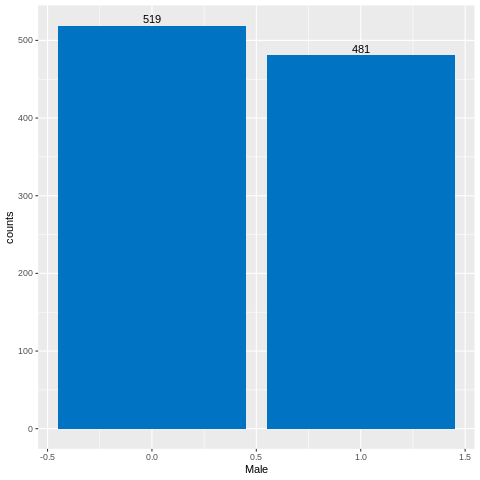

In [ ]:
#gender plot
%%R

library('ggplot2')
ggplot(df, aes(x = Male, y = counts)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = counts), vjust = -0.3)

0 - Female
1 - Male

High numbers of females who visited the site compared to males

In [ ]:
#Country

%%R

cntry <- advert %>%
  group_by(Country) %>%
  summarise(counts = n())
cntry

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 237 x 2
   Country                                      counts
   <fct>                                         <int>
 1 Afghanistan                                       8
 2 Albania                                           7
 3 Algeria                                           6
 4 American Samoa                                    5
 5 Andorra                                           2
 6 Angola                                            4
 7 Anguilla                                          6
 8 Antarctica (the territory South of 60 deg S)      3
 9 Antigua and Barbuda                               5
10 Argentina                                         2
# … with 227 more rows


Afghanistan had more people who visted the site.

In [ ]:
# city
%%R
city <- advert %>%
  group_by(City) %>%
  summarise(counts = n())
city

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 969 x 2
   City          counts
   <fct>          <int>
 1 Adamsbury          1
 2 Adamside           1
 3 Adamsstad          1
 4 Alanview           1
 5 Alexanderfurt      1
 6 Alexanderview      1
 7 Alexandrafort      1
 8 Alexisland         1
 9 Aliciatown         1
10 Alvaradoport       1
# … with 959 more rows


*people who visited the site were from different countries*

In [ ]:
##### clicked on Ad

%%R
ad <- advert %>%
  group_by(Clicked.on.Ad) %>%
  summarise(counts = n())
ad

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 2 x 2
  Clicked.on.Ad counts
          <int>  <int>
1             0    500
2             1    500


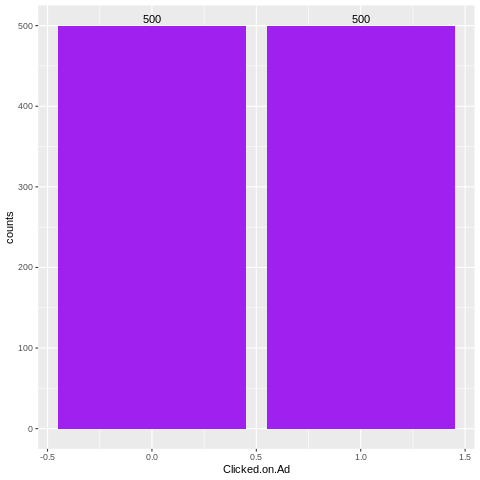

In [ ]:
# click on ad plot
%%R
library('ggplot2')
ggplot(ad, aes(x = Clicked.on.Ad, y = counts)) +
  geom_bar(fill = "Purple", stat = "identity") +
  geom_text(aes(label = counts), vjust = -0.3)

 0 - did not click
 1 - clicked
 
 There was an equal number of people who clicked and who did not click on the advertisment

# **BIVARIATE ANALYSIS**

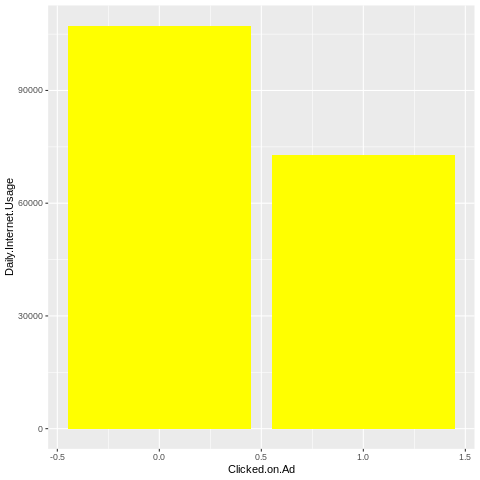

In [ ]:
### clicked on ad vs internet usage
%%R

ggplot(advert, aes(x=Clicked.on.Ad, y=Daily.Internet.Usage)) + 
  geom_bar(fill = 'Yellow' ,stat = "identity")

 Those who did not click on the advertisment used more internet compared to those who clicked.

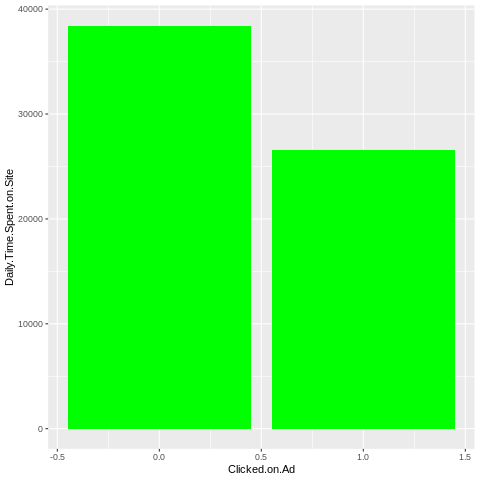

In [ ]:
# clicked on ad vs daily time spent on site
%%R
ggplot(advert, aes(x=Clicked.on.Ad, y=Daily.Time.Spent.on.Site)) + 
  geom_bar(fill = 'Green', stat = "identity")

  Those who did not click on the Ad spent a lot of time on the site compared to those who clicked.

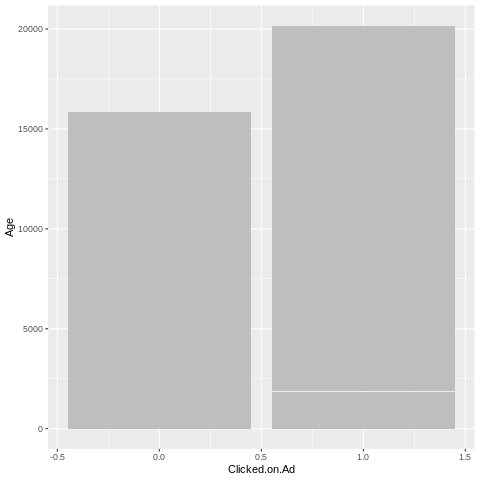

In [ ]:
### clicked on ad vs Age
%%R
ggplot(advert, aes(x=Clicked.on.Ad, y=Age)) + 
  geom_bar(fill = 'Grey', stat = "identity")

The older people are more likely to click on the Ads

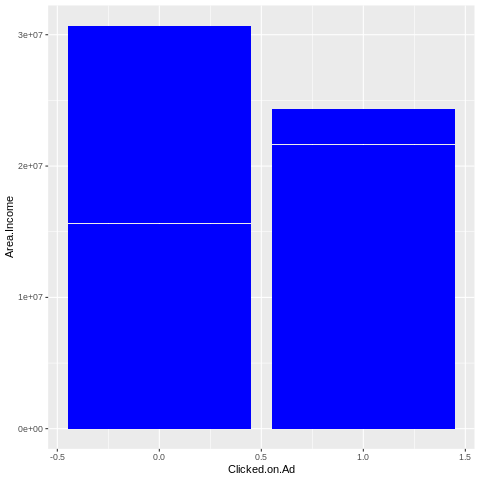

In [ ]:
### clicked on ad vs Area.Income 
%%R
ggplot(advert, aes(x=Clicked.on.Ad, y=Area.Income)) + 
  geom_bar(fill = 'Blue',stat = "identity")

Those who did not click on the Ads had more income compared to those who clicked the Ads

### COVARIANCE

Covariance measures how two variables are linearly related.

In [ ]:
# covariance of ad click and income
%%R
Ad_click <- advert$Clicked.on.Ad
income <- advert$Area.Income
cov(Ad_click, income)

[1] -3195.989


negative covariance between ad_clickand income

In [ ]:
# covariance of net usage and income

%%R
Ad_click <- advert$Clicked.on.Ad
net <- advert$Daily.Internet.Usage
cov(Ad_click, net)

[1] -17.27409


negative covariance between net usage and income

### SCATTER PLOTS

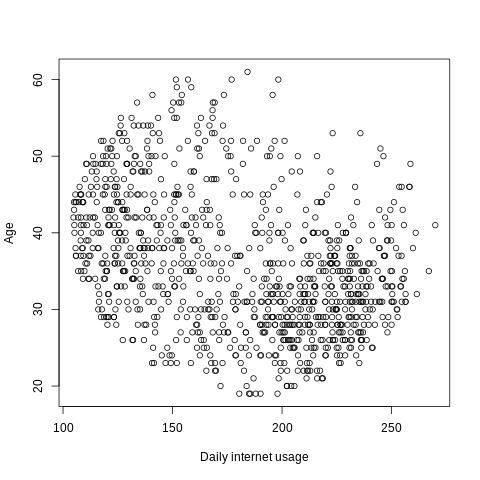

In [ ]:
#age vs net usage
%%R
plot(x = advert$Daily.Internet.Usage,y = advert$Age,
     xlab='Daily internet usage',
     ylab = 'Age')

the plot does not show a clear correlation as they are scatterd 

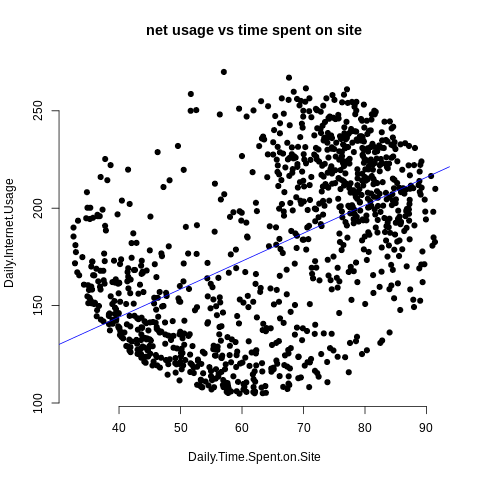

In [ ]:
# net usage vs time spent on site
%%R

plot(advert$Daily.Time.Spent.on.Site, advert$Daily.Internet.Usage, main = "net usage vs time spent on site",
     xlab = "Daily.Time.Spent.on.Site", ylab = "Daily.Internet.Usage",
     pch = 19, frame = FALSE)
abline(lm(advert$Daily.Internet.Usage ~ advert$Daily.Time.Spent.on.Site, data = advert), col = "blue")

the plot shows a positive correlation between net usage and time spent on site

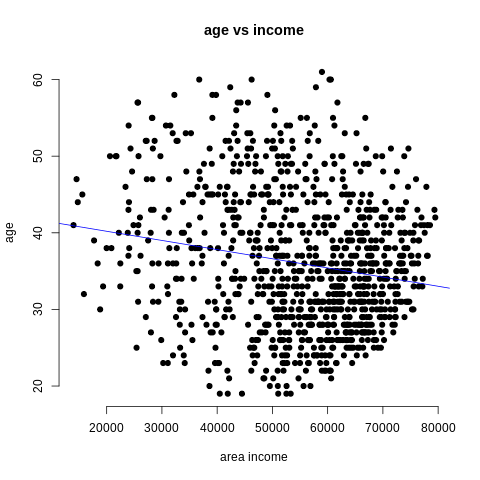

In [ ]:
#age vs income
%%R
plot(advert$Area.Income, advert$Age, main = "age vs income",
     xlab = "area income", ylab = "age",
     pch = 19, frame = FALSE)
abline(lm(advert$Age ~ advert$Area.Income, data = advert), col = "blue")

the plot shows a negative correlation between age and income

# **MODELLING**

## MULTILINEAR REGRESSION

In [ ]:
# stat summary
%%R
summary(advert)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [ ]:
# encoding categorical columns
%%R
advert$Ad.Topic.Line <- as.integer(as.factor(advert$Ad.Topic.Line))
advert$City <- as.integer(as.factor(advert$City))
advert$Country <- as.integer(as.factor(advert$Country))

In [ ]:
%%R
#Review the dataset
head(advert)

  Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage Ad.Topic.Line
1                    68.95  35    61833.90               256.09            92
2                    80.23  31    68441.85               193.77           465
3                    69.47  26    59785.94               236.50           567
4                    74.15  29    54806.18               245.89           904
5                    68.37  35    73889.99               225.58           767
6                    59.99  23    59761.56               226.74           806
  City Male Country           Timestamp Clicked.on.Ad
1  962    0     216 2016-03-27 00:53:11             0
2  904    1     148 2016-04-04 01:39:02             0
3  112    0     185 2016-03-13 20:35:42             0
4  940    1     104 2016-01-10 02:31:19             0
5  806    0      97 2016-06-03 03:36:18             0
6  283    1     159 2016-05-19 14:30:17             0


In [ ]:
# select columns to use
%%R
advert_df1 <- subset(advert, select = c(Daily.Time.Spent.on.Site, Area.Income, Male, Age, Daily.Internet.Usage, 
                                        Ad.Topic.Line, City, Country, Clicked.on.Ad))
dim(advert_df1)

[1] 1000    9


In [ ]:
# normalize the data
%%R
normalize <- function(x) {
    return((x - min(x)) / (max(x) - min(x)))
}

advert_n <- as.data.frame(lapply(advert_df1[1:9], normalize))

In [ ]:
#noramlized data
%%R
summary(advert_n)

 Daily.Time.Spent.on.Site  Area.Income          Male            Age        
 Min.   :0.0000           Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.3189           1st Qu.:0.5044   1st Qu.:0.000   1st Qu.:0.2381  
 Median :0.6054           Median :0.6568   Median :0.000   Median :0.3810  
 Mean   :0.5507           Mean   :0.6261   Mean   :0.481   Mean   :0.4050  
 3rd Qu.:0.7810           3rd Qu.:0.7860   3rd Qu.:1.000   3rd Qu.:0.5476  
 Max.   :1.0000           Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
 Daily.Internet.Usage Ad.Topic.Line       City           Country      
 Min.   :0.0000       Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2061       1st Qu.:0.25   1st Qu.:0.2549   1st Qu.:0.2288  
 Median :0.4743       Median :0.50   Median :0.5005   Median :0.4809  
 Mean   :0.4554       Mean   :0.50   Mean   :0.5024   Mean   :0.4890  
 3rd Qu.:0.6902       3rd Qu.:0.75   3rd Qu.:0.7513   3rd Qu.:0.7500  
 Max.   :1.0000       Max.   :1.00   Max. 

In [ ]:
#apply regression using lm
%%R

model <- lm(Clicked.on.Ad~., data = advert_n)

In [ ]:
%%R
summary(model)


Call:
lm(formula = Clicked.on.Ad ~ ., data = advert_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66642 -0.11662 -0.03199  0.04966  1.03480 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.41579    0.03762  37.635   <2e-16 ***
Daily.Time.Spent.on.Site -0.75142    0.02977 -25.241   <2e-16 ***
Area.Income              -0.40531    0.03511 -11.544   <2e-16 ***
Male                     -0.02857    0.01334  -2.142   0.0324 *  
Age                       0.37733    0.03480  10.842   <2e-16 ***
Daily.Internet.Usage     -0.86971    0.03085 -28.194   <2e-16 ***
Ad.Topic.Line             0.01846    0.02308   0.800   0.4241    
City                     -0.02494    0.02308  -1.081   0.2801    
Country                   0.02476    0.02251   1.100   0.2718    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2103 on 991 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R

The summary indicates the formula which is used to fit the data.

Residuals. The residuals simply show the difference between the target variable (cliked on Ad) and the other variables.
The residuals sectiom breaks it down into 5 summary points.

Coefficients. The clicked on Ad coefficient estimate is at 1. This means, on average, the people who visit the site are likely to click on an Ad.

t-value. is the measure of how many std our coefficient estimate is far away from 0. In our case most variable are far away from 0 meaning a relationship exists. Country, city, topic line and male are closer to 0 indicating they are slightly corre;ated to the target.

Coefficient - Pr(>t). A p-values less than 5% is a good cutoff. The p-value(s) in the model are less than 0.05 .

The model has quite performed well with an R^2 of 0.823

## **KNN**

In [ ]:
# column names

%%R
colnames(advert)

 [1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"           


In [ ]:
# select the numeric columns only

%%R
advert_df <- subset(advert, select = c(Daily.Time.Spent.on.Site, Area.Income, Male, Age, Daily.Internet.Usage, Clicked.on.Ad))
head(advert_df)

  Daily.Time.Spent.on.Site Area.Income Male Age Daily.Internet.Usage
1                    68.95    61833.90    0  35               256.09
2                    80.23    68441.85    1  31               193.77
3                    69.47    59785.94    0  26               236.50
4                    74.15    54806.18    1  29               245.89
5                    68.37    73889.99    0  35               225.58
6                    59.99    59761.56    1  23               226.74
  Clicked.on.Ad
1             0
2             0
3             0
4             0
5             0
6             0


In [ ]:
# normalize the numeric data
%%R
normalize <- function(x) {
    return((x - min(x)) / (max(x) - min(x)))
}

advertNorm <- as.data.frame(lapply(advert_df[1:5], normalize))

In [ ]:
# select the numeric columns only

%%R
advert_df <- subset(advert, select = c(Daily.Time.Spent.on.Site, Area.Income, Male, Age, Daily.Internet.Usage, Clicked.on.Ad))
head(advert_df)

  Daily.Time.Spent.on.Site Area.Income Male Age Daily.Internet.Usage
1                    68.95    61833.90    0  35               256.09
2                    80.23    68441.85    1  31               193.77
3                    69.47    59785.94    0  26               236.50
4                    74.15    54806.18    1  29               245.89
5                    68.37    73889.99    0  35               225.58
6                    59.99    59761.56    1  23               226.74
  Clicked.on.Ad
1             0
2             0
3             0
4             0
5             0
6             0


In [ ]:
%%R

# count of our target var(clicked on add)
table(advert_df$Clicked.on.Ad)


  0   1 
500 500 


In [ ]:
%%R
summary(advertNorm)

 Daily.Time.Spent.on.Site  Area.Income          Male            Age        
 Min.   :0.0000           Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.3189           1st Qu.:0.5044   1st Qu.:0.000   1st Qu.:0.2381  
 Median :0.6054           Median :0.6568   Median :0.000   Median :0.3810  
 Mean   :0.5507           Mean   :0.6261   Mean   :0.481   Mean   :0.4050  
 3rd Qu.:0.7810           3rd Qu.:0.7860   3rd Qu.:1.000   3rd Qu.:0.5476  
 Max.   :1.0000           Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
 Daily.Internet.Usage
 Min.   :0.0000      
 1st Qu.:0.2061      
 Median :0.4743      
 Mean   :0.4554      
 3rd Qu.:0.6902      
 Max.   :1.0000      


Creating train and test set

divide the data in the ratio of 80:20 for train and test data respectively

In [ ]:
%%R
# advert train is 80% and the advert test is 20%. The train and test does not contain the label
advert_train <- advertNorm[1:800,]
advert_test <- advertNorm[801:1000,]

print(dim(advert_train))
print(dim(advert_test))

[1] 800   5
[1] 200   5


In [ ]:
%%R
# including the target variable

advert_train_label <- advert_df[1:800, 6]
advert_test_label <- advert_df[801:1000, 6]

Training a model on data

In [ ]:
%%R
# loading the library class to use the knn() function
library(class)

use the knn() function to classify test data

In [ ]:
%%R

advert_test_pred <- knn(train = advert_train, test = advert_test, cl = advert_train_label, k = 10)
advert_test_pred

  [1] 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 [38] 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 [75] 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
[112] 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1
[149] 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
[186] 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
Levels: 0 1


Evaluate model performance
by using the CrossTable() function

In [ ]:
%%R
install.packages('gmodels')
library(gmodels)

In [ ]:
%%R
CrossTable(x = advert_test_label, y = advert_test_pred, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  200 

 
                  | advert_test_pred 
advert_test_label |         0 |         1 | Row Total | 
------------------|-----------|-----------|-----------|
                0 |        87 |         1 |        88 | 
                  |     0.989 |     0.011 |     0.440 | 
                  |     0.926 |     0.009 |           | 
                  |     0.435 |     0.005 |           | 
------------------|-----------|-----------|-----------|
                1 |         7 |       105 |       112 | 
                  |     0.062 |     0.938 |     0.560 | 
                  |     0.074 |     0.991 |           | 
                  |     0.035 |     0.525 |           | 
------------------|-----------|-----------|-----------|
     Column Total |        94 |       106 |       20

The confusion matrix shows whether a person clicked on the Ad or did not.
The test data consisted of 200 observations. Out of 94 of those who did not click on the Ads, 87 have been accurately predicted with a 43.5%, 7 have been wrongly predicted.

Out of 106 who clicked on the Ads, 105 have correctly been predicted with  percentage of 52.5%.

The total of those who did not click on the Ads were 94 and those who clicked on the Ad were 106.

More people clicked on the Ad compared to those who did not.


# CONCLUSION

From the analysis, females are more likely to click the Ads, people living in Afghanistan, those who spent less time on the site are ,ore likely to click on the advertisment.

# RECOMMENDATIONS

The entrepreneur should consider target more females as the are more likely to click on the Ads. She should also target older people, people living in Afghanistan, people with low income and those who internet usage is low.